# FIFA Data Visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('fifa21_cleaned_data.csv')

In [3]:
df.head()

,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,...,Hits,Height (ft),Height (in),BMI,Num_Positions,Team,Contract,Month,Day,Year
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,L. Messi,33,93,93,FC Barcelona 2004 - 2021,...,372.0,5,7,24.900200,3,FC Barcelona,2004 - 2021,Jul,1,2004
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,Cristiano Ronaldo,35,92,92,Juventus 2018 - 2022,...,344.0,6,2,23.493243,2,Juventus,2018 - 2022,Jul,10,2018
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,J. Oblak,27,91,93,Atlético Madrid 2014 - 2023,...,86.0,6,2,24.648649,1,Atlético Madrid,2014 - 2023,Jul,16,2014
3,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,CAM CM,K. De Bruyne,29,91,91,Manchester City 2015 - 2023,...,163.0,5,11,21.476294,2,Manchester City,2015 - 2023,Aug,30,2015
4,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,LW CAM,Neymar Jr,28,91,91,Paris Saint-Germain 2017 - 2022,...,273.0,5,9,22.148708,2,Paris Saint-Germain,2017 - 2022,Aug,3,2017


### Bar Graph of Nationalities

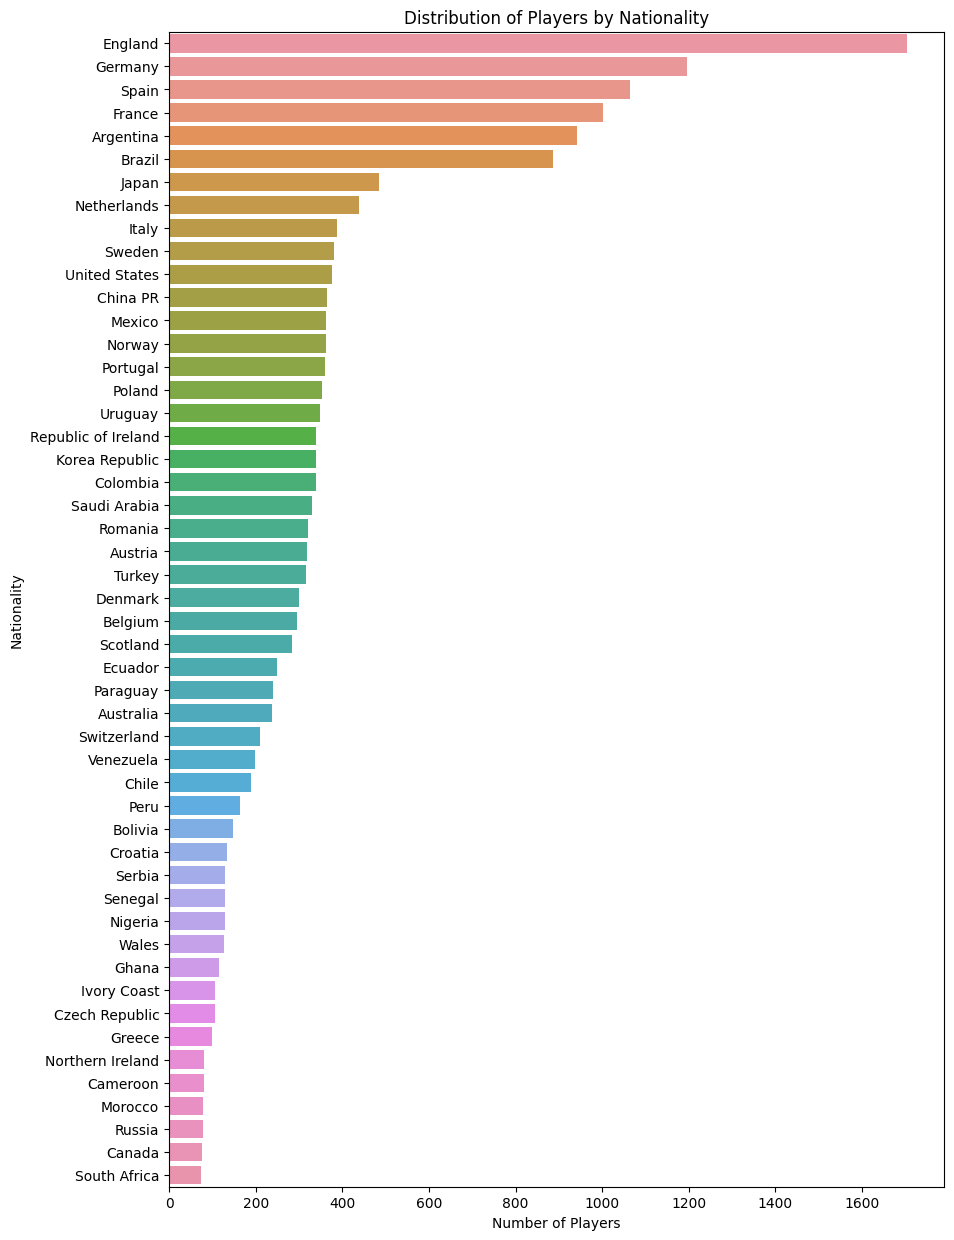

In [4]:
# Plotting the horizontal bar graph
# Only the Top 50 will be shown
nationality_counts = df['Nationality'].value_counts().head(50)
plt.figure(figsize=(10, 15))
sns.barplot(x=nationality_counts, y=nationality_counts.index, order=nationality_counts.index, orient='h')
plt.title('Distribution of Players by Nationality')
plt.xlabel('Number of Players')
plt.ylabel('Nationality')
plt.show()

### Correlation between Value and Release Clause

There is a strong linear correlation between value and release clause for a player.

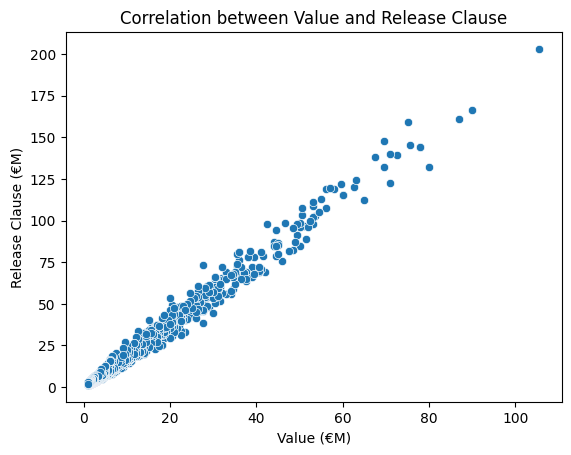

In [5]:
sns.scatterplot(x='Value (€M)', y='Release Clause (€M)', data=df)
plt.title('Correlation between Value and Release Clause')
plt.xlabel('Value (€M)')
plt.ylabel('Release Clause (€M)')
plt.show()

### Average Player Overall Rating by Team

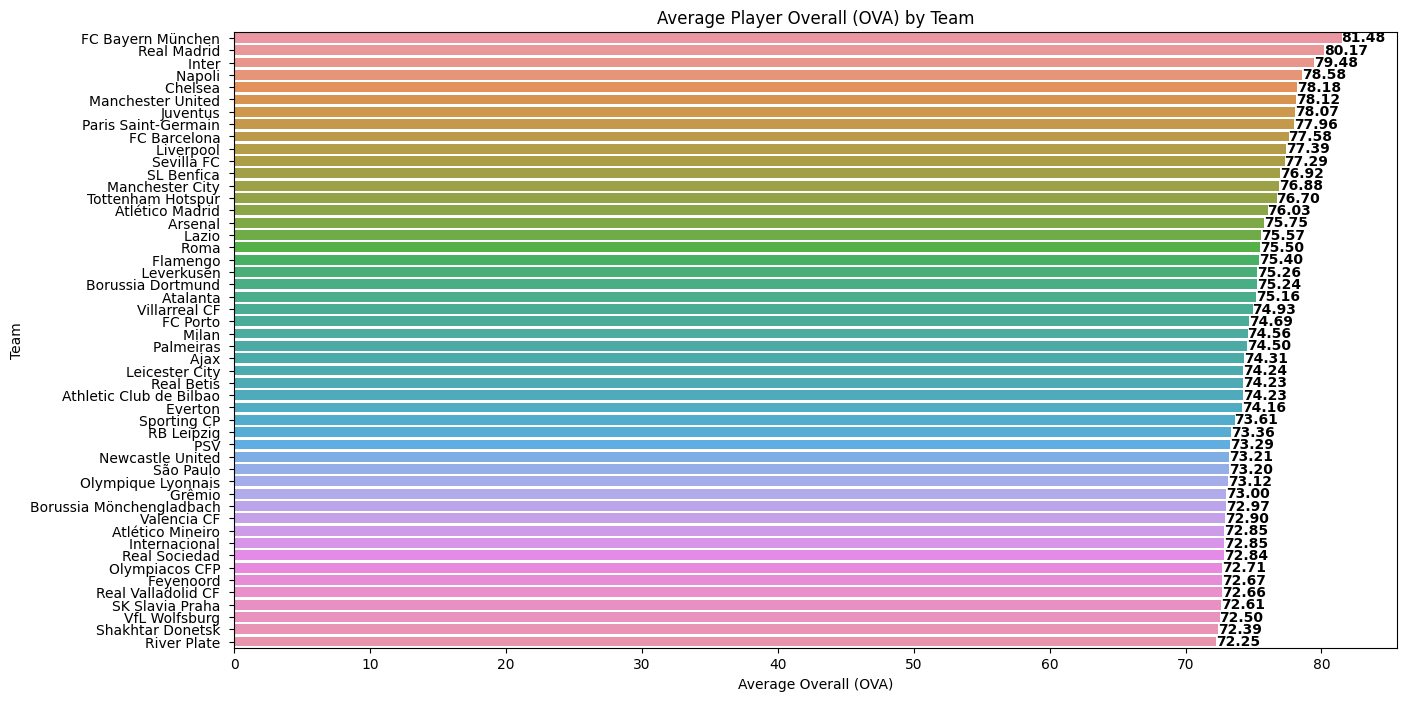

In [6]:
average_ova_by_team = df.groupby('Team')['↓OVA'].mean().sort_values(ascending=False)[0:50]
plt.figure(figsize=(15, 8))
ax = sns.barplot(x=average_ova_by_team.values, y=average_ova_by_team.index)
# Display average 'OVA' values
for i, value in enumerate(average_ova_by_team.values):
    ax.text(value, i, f'{value:.2f}', ha='left', va='center', color='black', fontweight='bold')

plt.title('Average Player Overall (OVA) by Team')
plt.xlabel('Average Overall (OVA)')
plt.ylabel('Team')
plt.show()

### Histogram of the Age of the Players

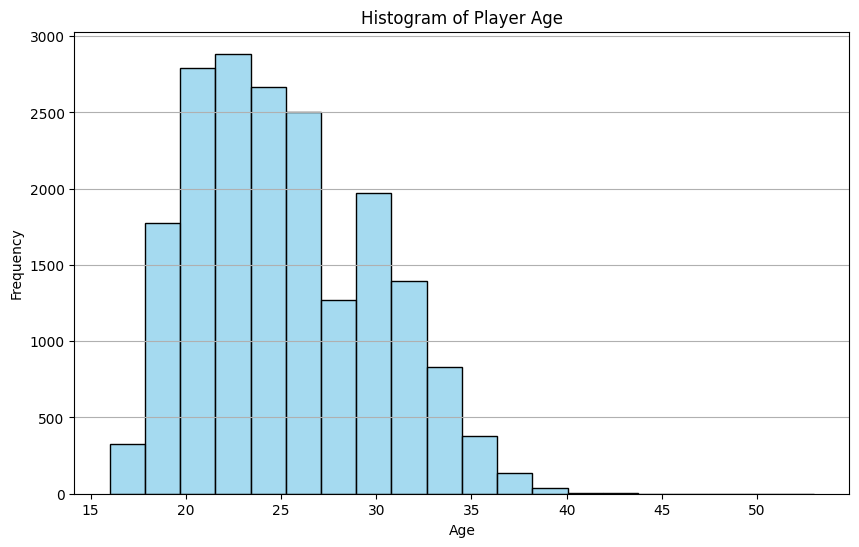

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=False, color='skyblue', edgecolor='black')
plt.title('Histogram of Player Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

### Player Overall Ranking Box Plot

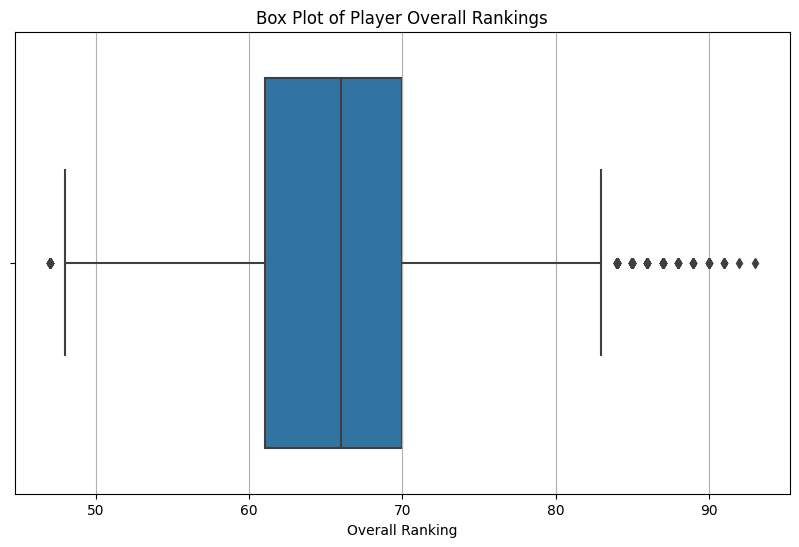

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['↓OVA'])
plt.title('Box Plot of Player Overall Rankings')
plt.xlabel('Overall Ranking')
plt.grid(axis='x')
plt.show()

### Average Player value ('Value (€M)') Over the years

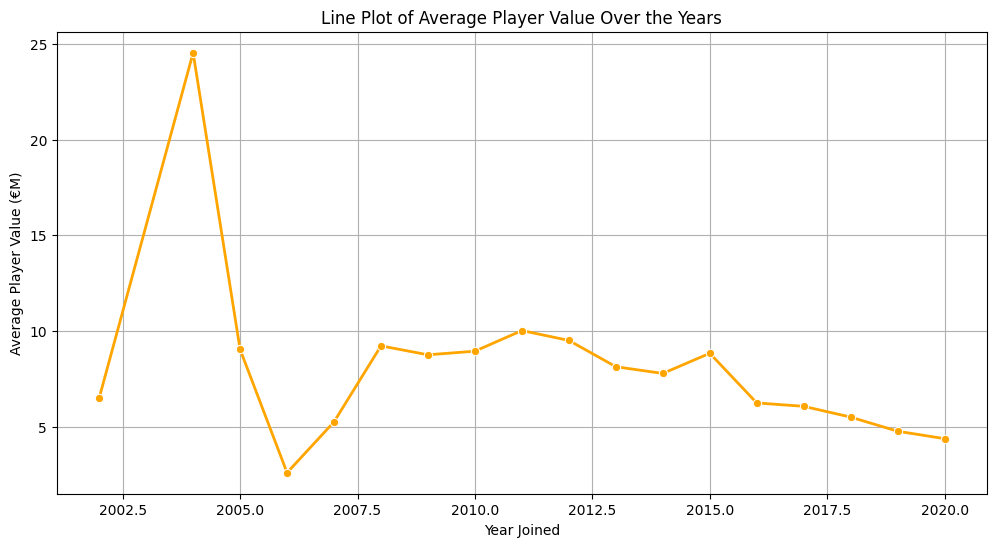

In [9]:
# Calculate the average value per year
avg_value_per_year = df.groupby('Year')['Value (€M)'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Value (€M)', data=avg_value_per_year, marker='o', color='orange', linewidth=2)
plt.title('Line Plot of Average Player Value Over the Years')
plt.xlabel('Year Joined')
plt.ylabel('Average Player Value (€M)')
plt.grid(axis='both')
plt.show()